# Lecture 5 Extra

## matplotlib
- why matplotlib
- the functional approach
- the object-oriented approach

#### Dataset used
- stocks-sp500
---

### Why matplotlib?

`matplotlib` is the primary charting library of Python. It is a massive library, which offers so much, that it can easily become overwhelming. Creating a basic chart is fairly simple, but sometimes just a little customization already requires a deep dive into the API. 

One of the reasons we cover matplotlib here though is that many other libraries are also built on the matplotlib API, and  plotting charts directly from Pandas dataframes is easier if we have a basic understading of matplotlib's mechanics. There are other popular charting packages, such as `seaborn` or `Plotly`, but we think that a real Pythonista should be able to work with matplotlib objects.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

A good sumary of the hows and whys of matplotlib can be found here: [https://heartbeat.comet.ml/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39](https://heartbeat.comet.ml/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39). 

There are two ways of creating a matplotlib plot.

### The Functional Approach

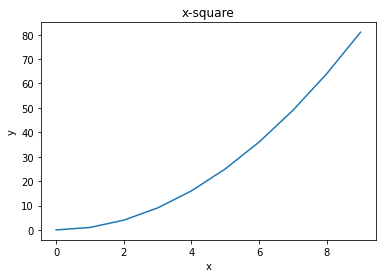

In [2]:
x = range(0, 10)
y = [i ** 2 for i in x]

plt.plot(x,y)
plt.title('x-square')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

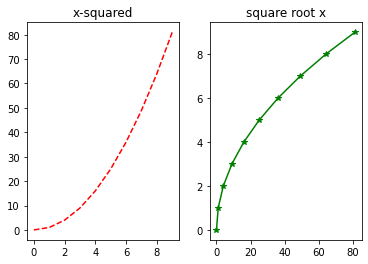

In [3]:
plt.subplot(1,2,1) # nrows, ncols, index of the next plot starting with index 1 from the top left and increasing to the right
plt.plot(x, y, 'r--') # 'r' stands for red, '--' stands for dash
plt.title('x-squared')
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-')
plt.title('square root x');  # insted of plt.show() you can also use a semicolon to show the plot

Matplotlib color options can be found here: [https://matplotlib.org/stable/gallery/color/named_colors.html](https://matplotlib.org/stable/gallery/color/named_colors.html)

### The Object-oriented Approach

There are two key [components](https://files.realpython.com/media/fig_map.bc8c7cabd823.png) in a Plot; namely, `Figure` and `Axes`.

The `Figure` is the top-level container that acts as the window or page on which everything is drawn. It can contain multiple independent figures, or `Axes`, a subtitle (which is a centered title for the figure), a legend, a color bar, etc.

The `Axes` is the area on which we plot our data and any labels/ticks associated with it. Each Axes has an X-Axis and a Y-Axis

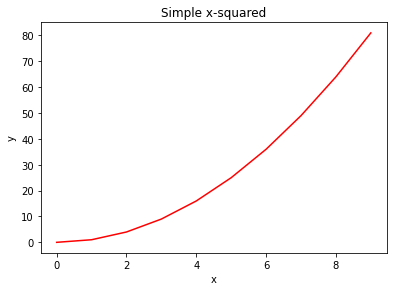

In [4]:
x = range(0, 10)
y = [i ** 2 for i in x]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Simple x-squared');

We can do a plot within a plot.

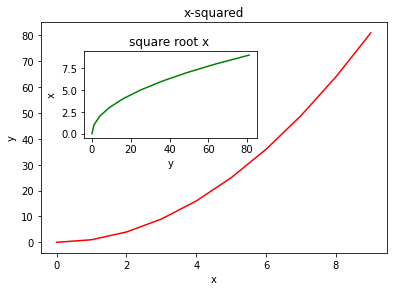

In [5]:
fig = plt.figure()

axes1 = fig.add_axes([0, 0, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.1, 0.4, 0.4, 0.3]) # inset axes: left and bottom of the lower-left corner, width, height

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('x-squared')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('square root x ');

Let's do some stock market price discovery!

In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('https://osf.io/4pgrf/download')

In [8]:
df.head()

,ticker,ref.date,price.open,price.close,price.adjusted,price.low,price.high,volume
0,ACN,2001-07-19,15.10,15.17,11.497672,15.00,15.29,34994300.0
1,ACN,2001-07-20,15.05,15.01,11.376402,14.80,15.05,9238500.0
2,ACN,2001-07-23,15.00,15.00,11.368821,14.55,15.01,7501000.0
3,ACN,2001-07-24,14.95,14.86,11.262713,14.70,14.97,3537300.0
4,ACN,2001-07-25,14.70,14.95,11.330926,14.65,14.95,4208100.0


In [9]:
df.shape

(304859, 8)

In [10]:
df['ref.date'] = pd.to_datetime(df['ref.date'])

In [11]:
df.ticker.unique()

array(['ACN', 'ADBE', 'AMD', 'AKAM', 'ADS', 'APH', 'ADI', 'ANSS', 'AAPL',
       'AMAT', 'ANET', 'ADSK', 'ADP', 'AVGO', 'BR', 'CDNS', 'CSCO',
       'CTXS', 'CTSH', 'GLW', 'DXC', 'FFIV', 'FIS', 'FISV', 'FLT', 'FLIR',
       'FTNT', 'IT', 'GPN', 'HPE', 'HPQ', 'INTC', 'IBM', 'INTU', 'IPGP',
       'JKHY', 'JNPR', 'KEYS', 'KLAC', 'LRCX', 'LDOS', 'MA', 'MXIM',
       'MCHP', 'MU', 'MSFT', 'MSI', 'NTAP', 'NVDA', 'ORCL', 'PAYX',
       'PYPL', 'QRVO', 'QCOM', 'CRM', 'STX', 'SWKS', 'SYMC', 'SNPS',
       'TEL', 'TXN', 'TSS', 'VRSN', 'V', 'WDC', 'WU', 'XRX', 'XLNX'],
      dtype=object)

In [12]:
# 2 ways to convert a Pandas column to list
date = list(df[df.ticker == 'MSFT']['ref.date'])
price = df[df.ticker == 'MSFT']['price.close'].tolist()

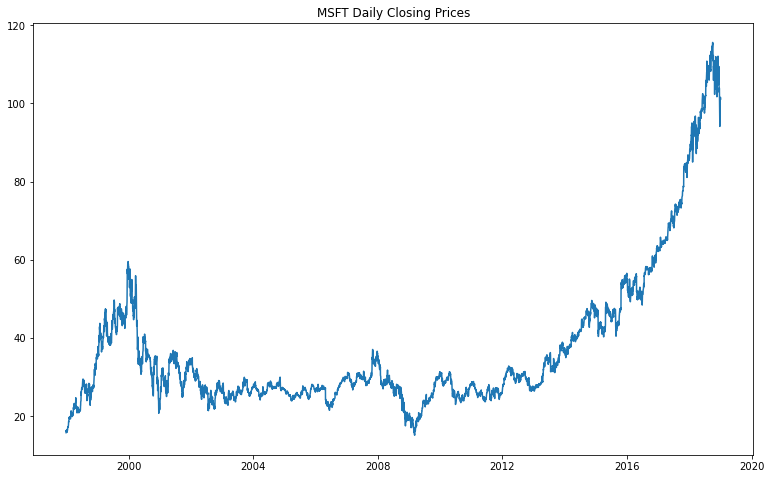

In [13]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('MSFT Daily Closing Prices')
ax.plot(date, price)
plt.show();

Adding additional chart elements.
- y-axis limits
- legends

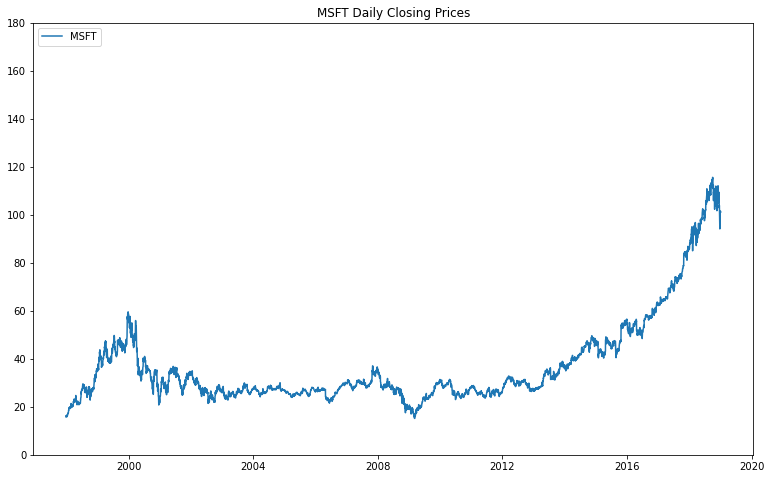

In [14]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('MSFT Daily Closing Prices')
ax.plot(date, price, label = 'MSFT')
plt.legend(loc = 'upper left')
ax.set_ylim(0,180)
plt.show();

- average line

In [15]:
date = df[df.ticker == 'MSFT']['ref.date'].tolist()
price = df[df.ticker == 'MSFT']['price.close'].tolist()
meanprice = np.mean(price)

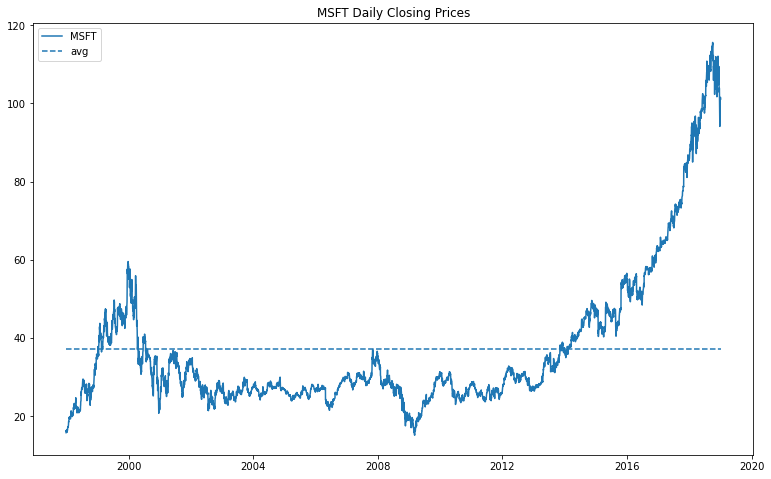

In [16]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('MSFT Daily Closing Prices')
ax.plot(date, price, label = 'MSFT')
ax.hlines(y = meanprice, xmin = date[0], xmax = date[-1], linestyle = '--', label = 'avg')
plt.legend(loc = 'upper left')
plt.show();

- log scale 

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('MSFT Daily Closing Prices')
ax.plot(date, price, label = 'MSFT')
ax.hlines(y = meanprice, xmin = date[0], xmax = date[-1], linestyle = '--', label = 'avg')
ax.set_yscale('log')
plt.legend(loc = 'upper left')
plt.show();

- plotting two time series of different scale &#8594; use a secondary axis

In [ ]:
date = df[df.ticker == 'MSFT']['ref.date'].tolist()
price_msft = df[df.ticker == 'MSFT']['price.close'].tolist()
price_aapl = df[df.ticker == 'AAPL']['price.close'].tolist()


fig, ax1 = plt.subplots(figsize = (10,6))

ax1.plot(date, price_msft, color = 'k')
ax1.xaxis_date()
ax1.set_ylabel("MSFT", color = 'k')
ax2 = ax1.twinx()
ax2.plot(date, price_aapl, color = "royalblue")
ax2.set_ylabel("AAPL", color = "royalblue")
plt.title('Microsoft and Apple, past twenty years');

- histogram of daily price changes

In [ ]:
df_msft = df[df.ticker == 'MSFT']
df_msft['pct_chg'] = df_msft['price.close'].pct_change(periods = 1)

In [ ]:
df_msft.head()

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('MSFT Daily Price Changes')
ax.hist(df_msft.pct_chg, bins = 50)

#plt.legend(loc = 'upper left')
plt.show();

- spacing between the bars + horizontal grids

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('MSFT Daily Price Changes')
ax.hist(df_msft.pct_chg, bins = 50, rwidth = 0.9)
plt.grid(axis = 'y', linestyle='--', linewidth=1)
#plt.legend(loc = 'upper left')
plt.show();

- chart within a chart

In [ ]:
fig = plt.figure(figsize = (10,6))

axes1 = fig.add_axes([0, 0, 1, 1]) # main axes
axes2 = fig.add_axes([0.25, 0.55, 0.45, 0.4]) # inset axes

# main figure
axes1.plot(date, price_msft)
axes1.set_xlabel('date')
axes1.set_ylabel('MSFT (log scale)')
axes1.set_yscale('log')
axes1.set_title('Microsoft Stock Price')

# insert
axes2.plot(date, price_aapl, color = 'black')
axes2.set_xlabel('date', fontsize = 8)
axes2.set_ylabel('AAPL (log)',  fontsize = 8)
axes2.set_yscale('log')
axes2.grid(axis = 'y', linestyle='--', linewidth=1)
axes2.set_title('Apple Stock Price', fontsize = 8);

Note that both price axes are quoted in scientific notation. It is kind of tricky to convert it into a easy-to-read format but not impossible. 

In [ ]:
import matplotlib as mpl

In [ ]:
fig = plt.figure(figsize = (10,6))

axes1 = fig.add_axes([0, 0, 1, 1]) # main axes
axes2 = fig.add_axes([0.25, 0.55, 0.45, 0.4]) # inset axes

# main figure
axes1.plot(date, price_msft)
axes1.set_xlabel('date')
axes1.set_ylabel('MSFT')
axes1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) # This line takes care of the number formatting. 
axes1.set_title('Microsoft Stock Price')

# insert
axes2.plot(date, price_aapl, color = 'black')
axes2.set_xlabel('date', fontsize = 8)
axes2.set_ylabel('AAPL (log)',  fontsize = 8)
axes2.set_yscale('log')
axes2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
axes2.grid(axis = 'y', linestyle='--', linewidth=1)
axes2.set_title('Apple Stock Price', fontsize = 8);